In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [2]:
LYAPUNOV = 0.91
DEL_T = 0.02
STEPS = 4000
WASHOUT = 3500

In [9]:
u = data.generate_lorenz_63(del_t=DEL_T, steps=STEPS, washout=WASHOUT)
T = u.shape[0]
time = np.arange(T) * DEL_T * LYAPUNOV

In [10]:
TAU = 5

In [32]:
only_x = u[:, 0]
u_mod = np.ndarray((T - TAU, TAU))
for t in range(TAU):
    u_mod[:, t] = only_x[t:T - (TAU - t)]
u_mod.shape

(495, 5)

In [33]:
T_mod = u_mod.shape[0]
time_mod = np.arange(T_mod) * DEL_T * LYAPUNOV

Text(0, 0.5, 'x')

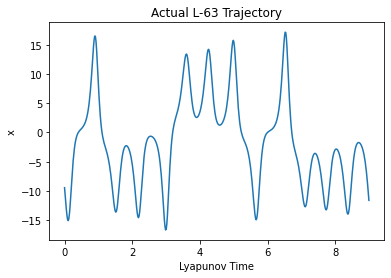

In [34]:
plt.figure(facecolor="white")
plt.plot(time_mod, u_mod[:,0])
plt.title("Actual L-63 Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("x")

In [35]:
seed = 42
W_out, r, A, W_in = res.train_p(u_mod, rho=0.1, s_in=1, R=500, beta=10e-4, seed=seed)
test_preds = res.predict(u_mod[0], W_out, T_mod, A, W_in)

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


Text(0, 0.5, 'Phase Space')

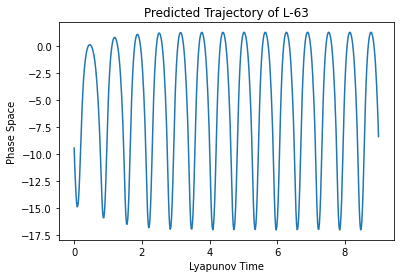

In [40]:
plt.figure(facecolor="white")
plt.plot(time_mod, test_preds[:,0])
plt.title("Predicted Trajectory of L-63")
plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [42]:
error.RMSE(u_mod[:, 0], test_preds[:, 0])

10.502732736585541

Text(0, 0.5, 'Phase Space')

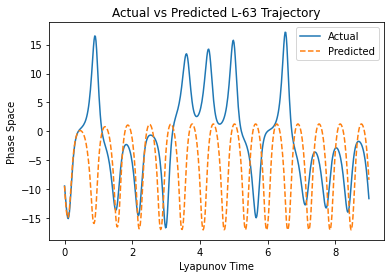

In [44]:
plt.figure(facecolor="white")
plt.plot(time_mod, u_mod[:,0], label="Actual")
plt.plot(time_mod, test_preds[:,0], label="Predicted", linestyle="dashed")

plt.legend()

plt.title("Actual vs Predicted L-63 Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")